In [115]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import pickle
import os
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [140]:
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

In [117]:
model = LogisticRegression(max_iter=1000)

In [141]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data[0],data[1])

In [148]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [120]:
print("Accuracy: ", model.score(X_test, y_test))

Accuracy:  1.0


In [149]:
model.coef_[0]

array([-3.78474664e-01,  7.94896995e-01, -4.24758503e-01, -3.78929407e-06])

In [151]:
with open('LogisticRegression.pickle', 'wb') as f:
  pickle.dump(model, f)

In [145]:
def loadmodel(name='LogisticRegression.pickle'):
    with open(name, 'rb') as f:
        model = pickle.load(f)
    return model

In [152]:
def removeGreen(img,model,bg):
    if img.shape != bg.shape:
        bg = cv.resize(bg, (img.shape[1], img.shape[0]))
    a3, a2, a1, a0 = model.coef_[0]

    B, G, R = cv.split(img)
    inter = np.ones_like(B)

    mask = a3 * B + a2 * G + a1 * R + a0 * inter

    mask = 1 / (1 + np.exp(-mask))

    img[mask > 0.99999] = bg[mask > 0.99999]
    
    return img

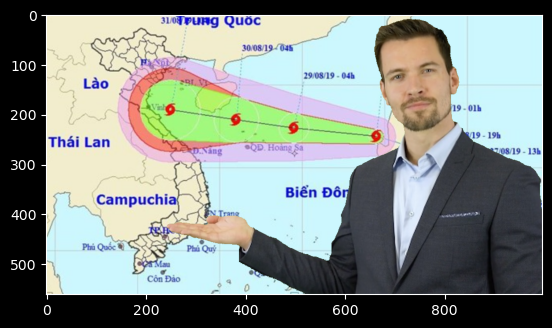

In [155]:
fg = cv.imread('foreground/fg-1.jpg',1)
bg = cv.imread('background/bg-1.jpg',1)

img = removeGreen(fg, model, bg)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)